In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ley_ohm import graficar_ley_ohm
from vm_vf import vmult_vs_vfuente
from resistenciaMult import resistencia_mult

Pendiente (ajuste lineal): 1.007
Ordenada al origen: -0.063


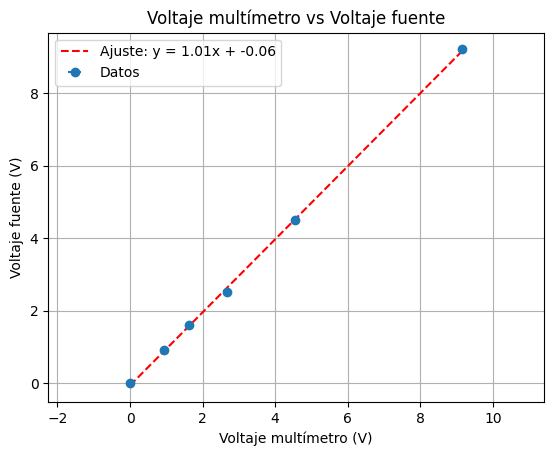

In [16]:
df_volts = pd.read_csv('../datasets/medicionesV.csv')
m, b = vmult_vs_vfuente(df_volts)

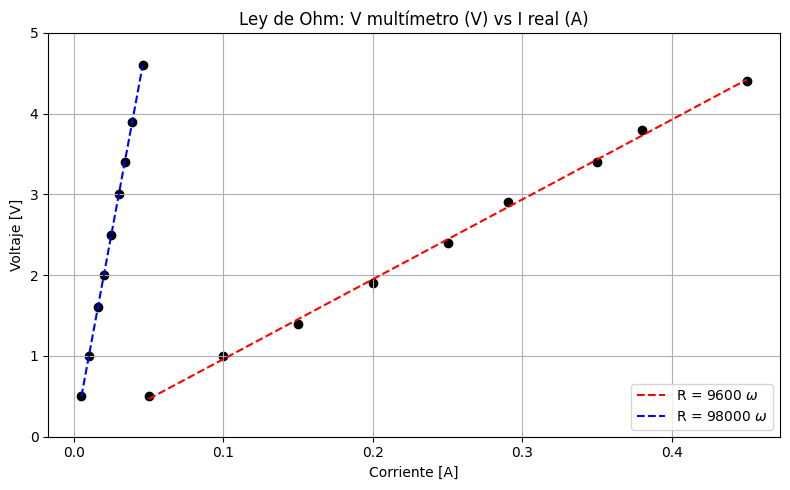

In [17]:
# Datasets
df_9600 = pd.read_csv('../datasets/mediciones1.csv')
df_98000 = pd.read_csv('../datasets/mediciones2.csv')
graficar_ley_ohm(df_9600, df_98000,v_col='V multímetro (V)', i_col='I real (A)')

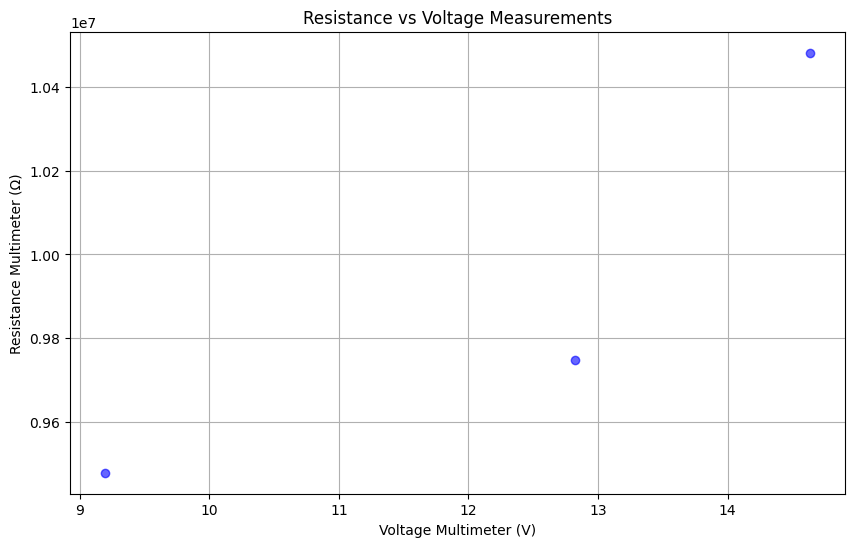

In [19]:
df_ej2 = pd.read_csv('../datasets/mediciones3.csv')
df_ej2 = df_ej2[df_ej2['R'] == 990000]

resistencia_mult(df_ej2, m, b)